In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/crit_score_games.csv")
df.head()

,title,total_sales,release_date,critic_score,genre,publisher
0,.hack//G.U. Vol.2//Reminisce,0.23,2007-05-08,6.2,Role-Playing,Namco Bandai
1,.hack//G.U. Vol.3//Redemption,0.17,2007-09-10,5.7,Role-Playing,Namco Bandai
2,.hack//Infection Part 1,1.27,2003-02-11,7.7,Role-Playing,Bandai
3,.hack//Mutation Part 2,0.68,2003-05-07,7.5,Role-Playing,Bandai
4,.hack//Outbreak Part 3,0.46,2003-09-09,7.1,Role-Playing,Bandai


In [4]:
df.critic_score.describe()

count    2873.000000
mean        6.899930
std         1.484821
min         1.000000
25%         6.000000
50%         7.100000
75%         8.000000
max        10.000000
Name: critic_score, dtype: float64

In [5]:
df.total_sales.describe()

count    2873.000000
mean        1.058730
std         2.488819
min         0.000000
25%         0.110000
50%         0.320000
75%         0.900000
max        48.430000
Name: total_sales, dtype: float64

In [11]:
df[df['publisher'] == 'Ubisoft']['total_sales'].describe()

count    188.000000
mean       1.157181
std        2.050920
min        0.000000
25%        0.120000
50%        0.360000
75%        1.157500
max       13.710000
Name: total_sales, dtype: float64

In [25]:
df[df['publisher'].str.contains('Rockstar')]['total_sales'].describe()

count    28.000000
mean      6.775000
std       9.974485
min       0.110000
25%       1.582500
50%       3.170000
75%       7.607500
max      48.430000
Name: total_sales, dtype: float64

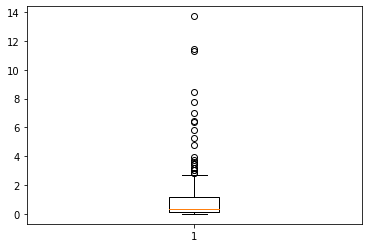

In [28]:
plt.boxplot(df[df['publisher'] == 'Ubisoft']['total_sales']);

In [30]:
df[df['total_sales'] == max(df['total_sales'])]

,title,total_sales,release_date,critic_score,genre,publisher
1145,Grand Theft Auto V,48.43,2013-09-17,9.0,Action,Rockstar Games


In [31]:
df

,title,total_sales,release_date,critic_score,genre,publisher
0,.hack//G.U. Vol.2//Reminisce,0.23,2007-05-08,6.2,Role-Playing,Namco Bandai
1,.hack//G.U. Vol.3//Redemption,0.17,2007-09-10,5.7,Role-Playing,Namco Bandai
2,.hack//Infection Part 1,1.27,2003-02-11,7.7,Role-Playing,Bandai
3,.hack//Mutation Part 2,0.68,2003-05-07,7.5,Role-Playing,Bandai
4,.hack//Outbreak Part 3,0.46,2003-09-09,7.1,Role-Playing,Bandai
...,...,...,...,...,...,...
2868,bit Generations: Dotstream,0.01,2006-07-13,8.0,Racing,Nintendo
2869,de Blob 2,0.65,2011-02-22,7.5,Platform,THQ
2870,echochrome,0.09,2008-05-01,7.6,Puzzle,Sony Computer Entertainment
2871,echoshift,0.00,2010-02-24,7.5,Puzzle,Sony Computer Entertainment


In [34]:
df['year'] = [_.year for _ in pd.to_datetime(df['release_date'])]

In [60]:
df_grouped = df.groupby(['year', 'publisher']).agg({
    'total_sales': 'mean',
    'critic_score': 'mean'
})
df_grouped.reset_index(inplace=True)

In [61]:
highestTotalSalesList = []
lowestTotalSalesList = []
highestCritScoreList = []
lowestCritScoreList = []

def getTooltipItems(row):

    y = row['year']
    p = row['publisher']

    subset = df[(df.year == y) & (df.publisher == p)]

    highestByTotalSales = subset[subset['total_sales'] == max(subset['total_sales'])].title.iloc[0]
    highestTotalSalesList.append(highestByTotalSales)

    lowestByTotalSales = subset[subset['total_sales'] == min(subset['total_sales'])].title.iloc[0]
    lowestTotalSalesList.append(lowestByTotalSales)

    highestByCritScore = subset[subset['critic_score'] == max(subset['critic_score'])].title.iloc[0]
    highestCritScoreList.append(highestByCritScore)

    lowestByCritScore = subset[subset['critic_score'] == min(subset['critic_score'])].title.iloc[0]
    lowestCritScoreList.append(lowestByCritScore)

    return None

In [62]:
df_grouped.apply(getTooltipItems, axis=1)

0      None
1      None
2      None
3      None
4      None
       ... 
896    None
897    None
898    None
899    None
900    None
Length: 901, dtype: object

In [66]:
df_grouped['highestSales'] = highestTotalSalesList
df_grouped['lowestSales'] = lowestTotalSalesList
df_grouped['highestScore'] = highestCritScoreList
df_grouped['lowestScore'] = lowestCritScoreList

In [73]:
df[(df.year == 2011) & (df.publisher == 'Aksys Games')]

,title,total_sales,release_date,critic_score,genre,publisher,year
205,BIT.TRIP COMPLETE,0.09,2011-09-13,8.1,Misc,Aksys Games,2011
206,BIT.TRIP SAGA,0.14,2011-09-13,7.5,Platform,Aksys Games,2011
303,BlazBlue: Continuum Shift II,0.24,2011-05-31,6.0,Fighting,Aksys Games,2011
2000,Record of Agarest War Zero,0.23,2011-06-14,6.2,Strategy,Aksys Games,2011


In [72]:
df_grouped[df_grouped.year == 2011]

,year,publisher,total_sales,critic_score,highestSales,lowestSales,highestScore,lowestScore
649,2011,1C Company,0.060000,8.000000,Men of War: Assault Squad,Men of War: Assault Squad,Men of War: Assault Squad,Men of War: Assault Squad
650,2011,2K Games,1.590000,4.300000,Duke Nukem Forever,Duke Nukem Forever,Duke Nukem Forever,Duke Nukem Forever
651,2011,2K Sports,3.085000,6.250000,NBA 2K12,Top Spin 4,NBA 2K12,Top Spin 4
652,2011,505 Games,0.405000,4.750000,Rugby World Cup 2011,Supremacy MMA,Supremacy MMA,Rugby World Cup 2011
653,2011,Activision,5.507143,4.957143,Call of Duty: Modern Warfare 3,Spider-Man: Edge of Time,Skylanders: Spyro's Adventure,X-Men: Destiny
654,2011,Aksys Games,0.175000,6.950000,BlazBlue: Continuum Shift II,BIT.TRIP COMPLETE,BIT.TRIP COMPLETE,BlazBlue: Continuum Shift II
655,2011,Atari,0.695000,6.625000,Test Drive Unlimited 2,Dungeons & Dragons: Daggerdale,The Witcher 2: Assassins of Kings,Venetica
656,2011,Atlus,0.346250,7.150000,Catherine,Mahjong Cub3D,Radiant Historia,The Cursed Crusade
657,2011,Bethesda Softworks,6.567500,7.300000,The Elder Scrolls V: Skyrim,Hunted: The Demon's Forge,The Elder Scrolls V: Skyrim,Hunted: The Demon's Forge
658,2011,Capcom,0.587500,7.612500,Marvel vs. Capcom 3: Fate of Two Worlds,Ultimate Marvel vs. Capcom 3,Super Street Fighter IV: Arcade Edition,MotoGP 10/11


In [74]:
df_grouped

,year,publisher,total_sales,critic_score,highestSales,lowestSales,highestScore,lowestScore
0,1989,Ultra Games,4.170000,5.9,Teenage Mutant Ninja Turtles,Teenage Mutant Ninja Turtles,Teenage Mutant Ninja Turtles,Teenage Mutant Ninja Turtles
1,1991,Square,0.380000,9.0,Final Fantasy Adventure,Final Fantasy Adventure,Final Fantasy Adventure,Final Fantasy Adventure
2,1993,Activision,0.180000,8.0,Doom,Doom,Doom,Doom
3,1993,LucasArts,0.000000,9.0,Sam & Max Hit the Road,Sam & Max Hit the Road,Sam & Max Hit the Road,Sam & Max Hit the Road
4,1993,Maxis,2.140000,8.0,SimCity 2000,SimCity 2000,SimCity 2000,SimCity 2000
...,...,...,...,...,...,...,...,...
896,2018,Villa Gorilla,0.040000,9.0,Yoku's Island Express,Yoku's Island Express,Yoku's Island Express,Yoku's Island Express
897,2018,Warner Bros. Interactive Entertainment,0.763333,7.6,LEGO The Incredibles,LEGO DC Super-Villains,Fortnite,LEGO The Incredibles
898,2018,Xseed Games,0.020000,7.0,Gal Metal!,Gal Metal!,Gal Metal!,Gal Metal!
899,2019,NIS America,0.130000,7.0,The Legend of Heroes: Trails of Cold Steel III,The Legend of Heroes: Trails of Cold Steel III,The Legend of Heroes: Trails of Cold Steel III,The Legend of Heroes: Trails of Cold Steel III


In [75]:
df_grouped.to_csv("data/phu-data.csv")